# Lending Club Case Study


**Problem Statement**

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

There are four major parts that are needed to be done for this case study


1. Data Understanding
2. Data Cleaning
3. Data Analysis
4. Recommedations


### Data Understanding

We have gone through the loan dataset and picked up the important variables which needs to be cleaned and analysed

Important Variables

- Loan amnt
- Term
- Interest Rate
- Grade
- Sub grade
- Annual Income
- Purpose of Loan
- Employment Length
- Home ownership
- Verfication status

### Data Cleaning

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset

df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# checking the number of rows and columns

df.shape

(39717, 111)

In [5]:
# Taking a copy of the dataFrame

loan = df.copy(deep=True)

In [6]:
# Dropping of the columns which is not needed for the analysis

loan.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'], axis=1)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Finding out the columns with null values

loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# Dropping off the columns with null values

loan.dropna(axis=1, how='all', inplace=True)

In [11]:
# Checking again the number of columns

loan.shape

(39717, 57)

In [12]:
# After removing unwanted columns, the final dataFrame has 57 columns which is reduced from 111

In [13]:
# In the column loan_status, the value current denotes neither fully paid nor defaulted. So lets get rid of this value

loan = loan[~(loan['loan_status']== 'Current')]

In [14]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [15]:
# Now we have 2 unique values. Either fully paid or defaulted ('Charged Off')

In [19]:
# Finding out missing values in employment length

loan.emp_length.isna().sum()

1033

In [21]:
# Fill the missing values with mode

loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [22]:
loan.emp_length.mode()

0    10+ years
dtype: object

In [23]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace =True)

In [24]:
loan.emp_length.isna().sum()

0

In [27]:
# Removing the extra characters (+,<, years, year) in emp_lenth column as it should be float value

loan.emp_length = loan.emp_length.apply(lambda x: 0 if "<" in x else x.split('+')[0] if "+" in x else x.split()[0] if "years" in x else x.split()[0] if "year" in x else x)

In [29]:
loan.emp_length

0        10
1         0
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38577, dtype: object

In [143]:
# Converting the dtype from Object to float for emp_length

loan.astype({'emp_length':'float64'}).dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                     float64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [32]:
# Treating the outliers for annual income

loan.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2b4983c4688>,
 'caps': [<matplotlib.lines.Line2D at 0x2b4983dcfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b4983cdf48>],
 'medians': [<matplotlib.lines.Line2D at 0x2b49866aac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b49866ad08>],
 'means': []}

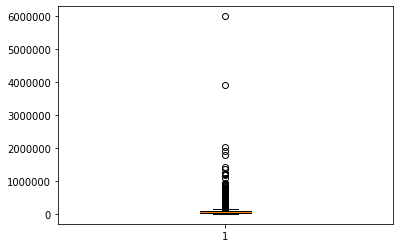

In [33]:
plt.boxplot(loan.annual_inc)

**The above boxplot clearly indicates that we have outliers in annual income which needs to corrected by rmeoving them.
This can be achieved by finding out the 90% quantile and remove all the values which is above the 90%**

In [34]:
Quantlie_90 = loan.annual_inc.quantile(0.90)
Quantlie_90

115000.0

In [35]:
loan = loan[loan.annual_inc <= Quantlie_90]

{'whiskers': [<matplotlib.lines.Line2D at 0x2b4a032ad88>,
 'caps': [<matplotlib.lines.Line2D at 0x2b4a032fb08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b4a0327d08>],
 'medians': [<matplotlib.lines.Line2D at 0x2b4a0333fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b4a0337a88>],
 'means': []}

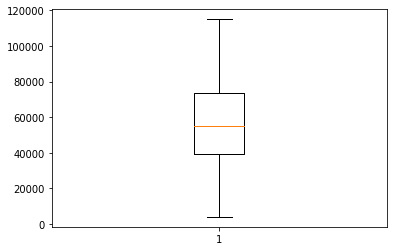

In [36]:
plt.boxplot(loan.annual_inc)

**Now the datat looks god after performing the corrections**

In [40]:
# Removing the alpabetical character from subgrade column

loan.sub_grade = loan.sub_grade.apply(lambda x: x[-1])
loan.sub_grade

0        2
1        4
2        5
3        1
5        4
        ..
39711    1
39712    4
39713    1
39714    4
39716    2
Name: sub_grade, Length: 34723, dtype: object

In [42]:
# Cleaning home_ownership columns

loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [44]:
(loan.home_ownership == 'NONE').sum()

2

In [45]:
# NONE value has only 2 entries. So we remove it

loan = loan[~(loan.home_ownership == 'NONE')]
(loan.home_ownership == 'NONE').sum()

0

In [46]:
# Partitioning the month and year from the issue_d column for better analysis

loan.issue_d

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39711    Jul-07
39712    Jul-07
39713    Jul-07
39714    Jul-07
39716    Jun-07
Name: issue_d, Length: 34721, dtype: object

In [47]:
loan_month_year = loan.issue_d.str.partition('-',True)
loan.issue_month = loan_month_year[0]

# After partitioning, the year has only last 2 digits to we add 20 in front of it to make whole year number

loan.issue_year = '20' + loan_month_year[2]

In [51]:
loan.issue_month

0        Dec
1        Dec
2        Dec
3        Dec
5        Dec
        ... 
39711    Jul
39712    Jul
39713    Jul
39714    Jul
39716    Jun
Name: 0, Length: 34721, dtype: object

In [52]:
loan.issue_year

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39711    2007
39712    2007
39713    2007
39714    2007
39716    2007
Name: 2, Length: 34721, dtype: object

**Creating bins for annual income and interest rate will give us added advantage in analysis the defaulters**

In [54]:
# Bins for int_rate column

loan.int_rate.describe()

count      34721
unique       369
top       10.99%
freq         812
Name: int_rate, dtype: object

In [56]:
# Removing the '%'

loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x[:-1]) if x[-1]=="%" else float(x))

In [57]:
loan.int_rate.describe()

count    34721.000000
mean        11.862351
std          3.644956
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [58]:
# Creating bins based on the above quantile values

loan['int_rate_bins'] = pd.cut(loan.int_rate, bins=4, precision=0, labels=['5%-9%','9%-12%','12%-15%','15%-25%'])

In [59]:
# Bins for int_rate column

loan.annual_inc.describe()

count     34721.000000
mean      57209.716355
std       23614.342788
min        4000.000000
25%       39600.000000
50%       54912.000000
75%       73600.000000
max      115000.000000
Name: annual_inc, dtype: float64

In [60]:
# Creating bins based on the above quantile values

loan['annual_inc_bins'] = pd.cut(loan.annual_inc, bins=4, precision=0, labels=['4k-39k','39k-55k','55k-74k','74k-115k'])

### Data Analysis and Visualization

Now the data has been cleaned for analysis anf lets start creating visualization the data by plotting only for defaulters ('Charged Off')

In [62]:
gradeOrder = loan.grade.sort_values().unique()

In [ ]:
# Creating a variable for defaulters loan status

charged_off = loan[loan.loan_status=='Charged Off']

[Text(0.5, 1.0, 'Plots number of loans based on grade')]

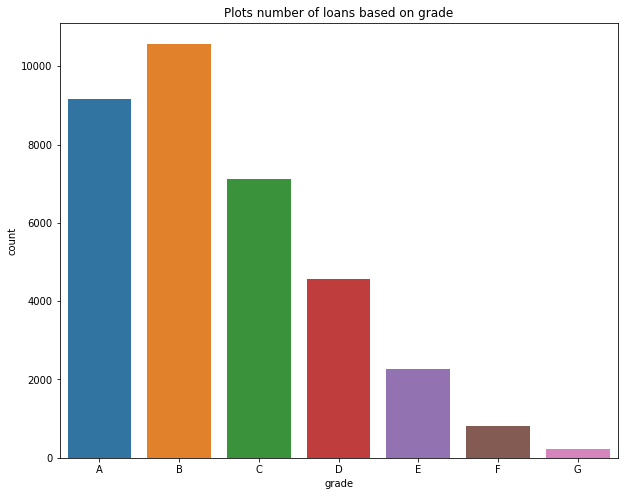

In [90]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'grade', order = gradeOrder, data = loan ).set(title='Plots number of loans based on grade')


[Text(0.5, 1.0, 'Plots number of defaulters based on grade')]

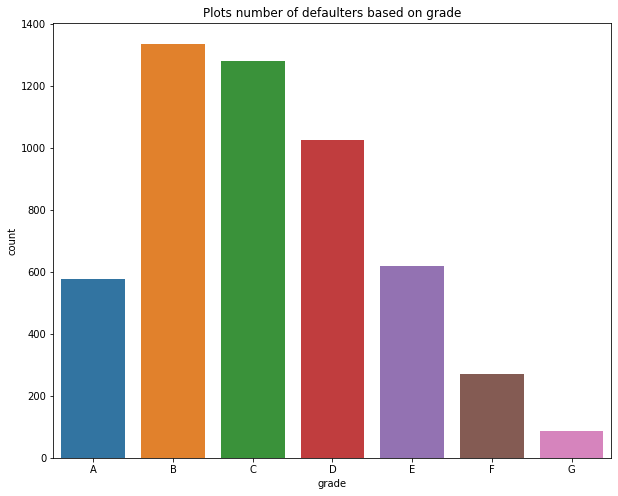

In [91]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'grade', order = gradeOrder, data = charged_off ).set(title='Plots number of defaulters based on grade')

[Text(0.5, 1.0, 'Plots number of loans based on sub grade')]

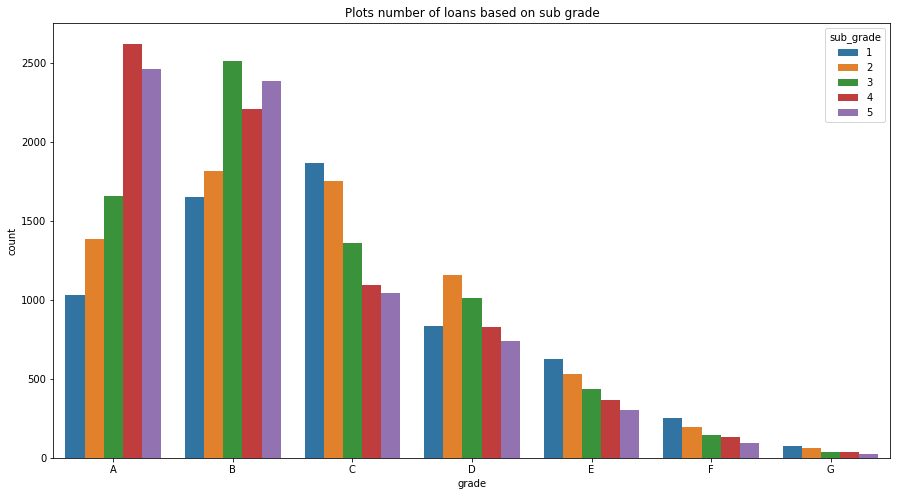

In [92]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'grade', order = gradeOrder, hue = 'sub_grade', data = loan ).set(title='Plots number of loans based on sub grade')

[Text(0.5, 1.0, 'Plots number of defaulters based on sub grade')]

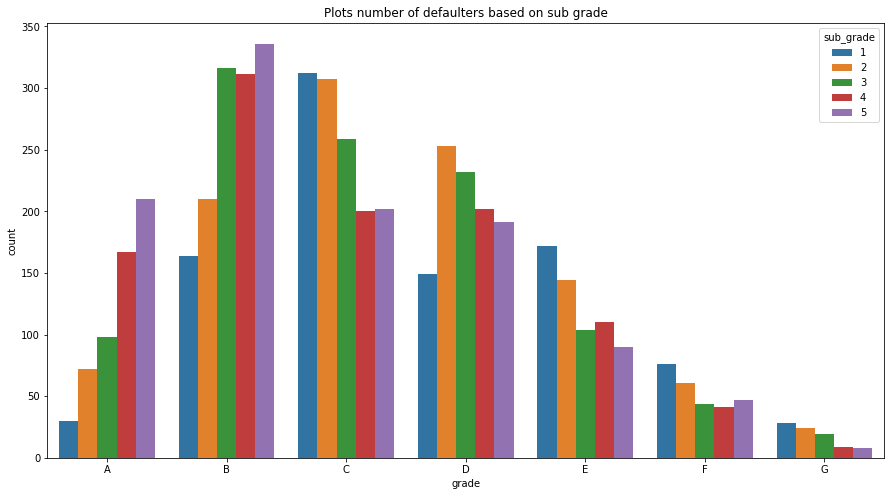

In [153]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'grade', order = gradeOrder, hue = 'sub_grade', data = charged_off ).set(title='Plots number of defaulters based on sub grade')

[Text(0.5, 1.0, 'Number of loans with home ownership')]

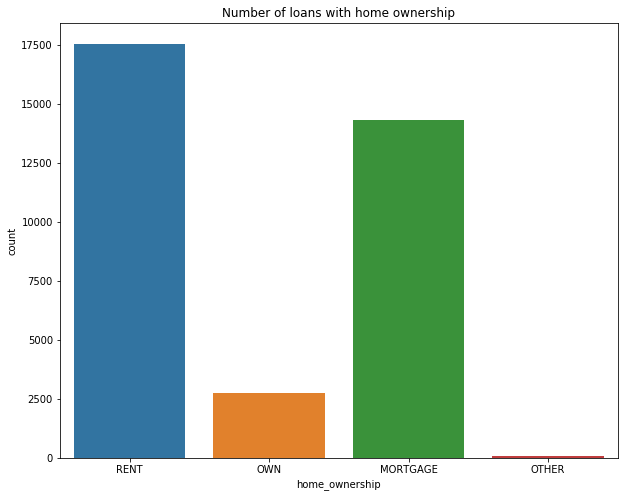

In [94]:
plt.figure(figsize=(10,8))
sns.countplot(x='home_ownership', data=loan).set(title='Number of loans with home ownership')

[Text(0.5, 1.0, 'Number of defaulters with home ownership')]

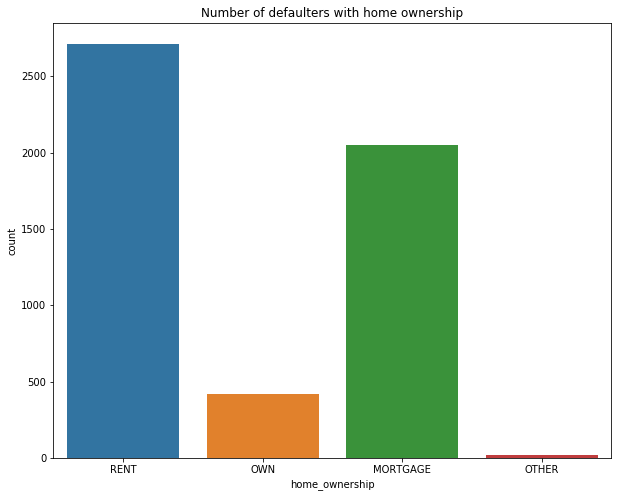

In [154]:
plt.figure(figsize=(10,8))
sns.countplot(x='home_ownership', data=charged_off).set(title='Number of defaulters with home ownership')

[Text(0.5, 1.0, 'Defaulters based on loan terms')]

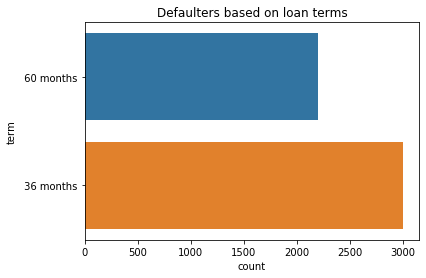

In [98]:
sns.countplot(y='term', data=charged_off).set(title='Defaulters based on loan terms')

[Text(0.5, 1.0, 'Defaulters based on verification status')]

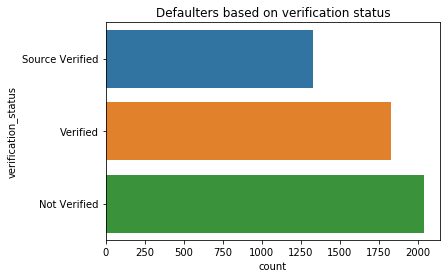

In [99]:
sns.countplot(y='verification_status', data=charged_off).set(title='Defaulters based on verification status')

[Text(0.5, 1.0, 'Defaulters based on interest rate category')]

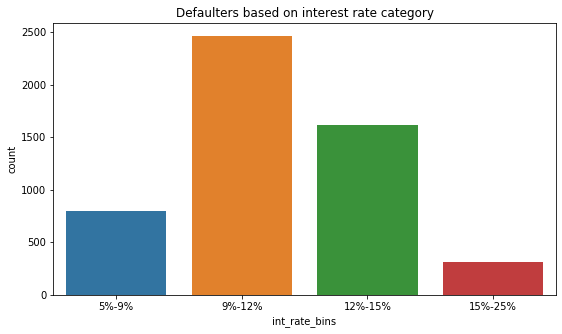

In [103]:
plt.figure(figsize=(9,5))
sns.countplot(x='int_rate_bins', data=charged_off).set(title='Defaulters based on interest rate category')

[Text(0.5, 1.0, 'Defaulters based on annual income category')]

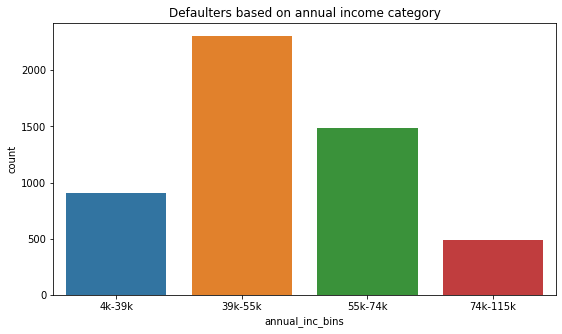

In [105]:
plt.figure(figsize=(9,5))
sns.countplot(x='annual_inc_bins', data=charged_off).set(title='Defaulters based on annual income category')

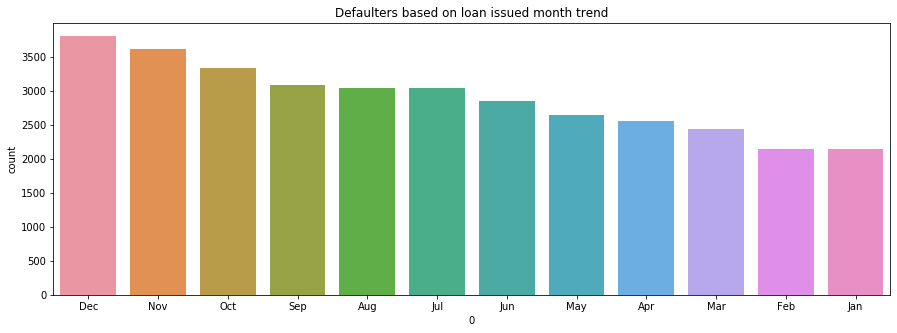

In [131]:
plt.figure(figsize=(15,5))
sns.countplot(data=charged_off, x=loan.issue_month).set(title='Defaulters based on loan issued month trend')
plt.show()

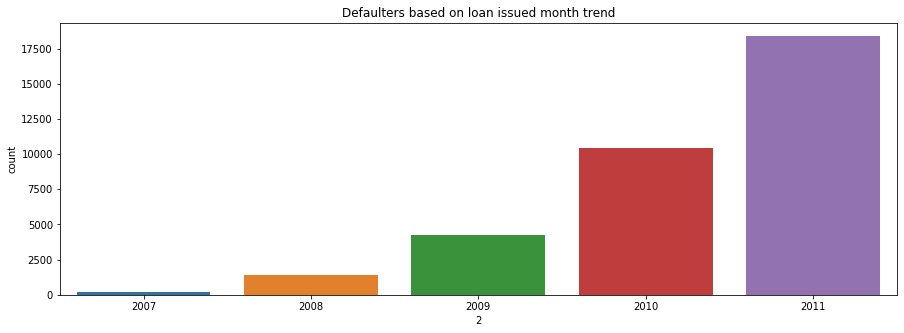

In [155]:
plt.figure(figsize=(15,5))
sns.countplot(data=charged_off, x=loan.issue_year).set(title='Defaulters based on loan issued month trend')
plt.show()

[Text(0.5, 1.0, 'Defaulters based on loan purpose')]

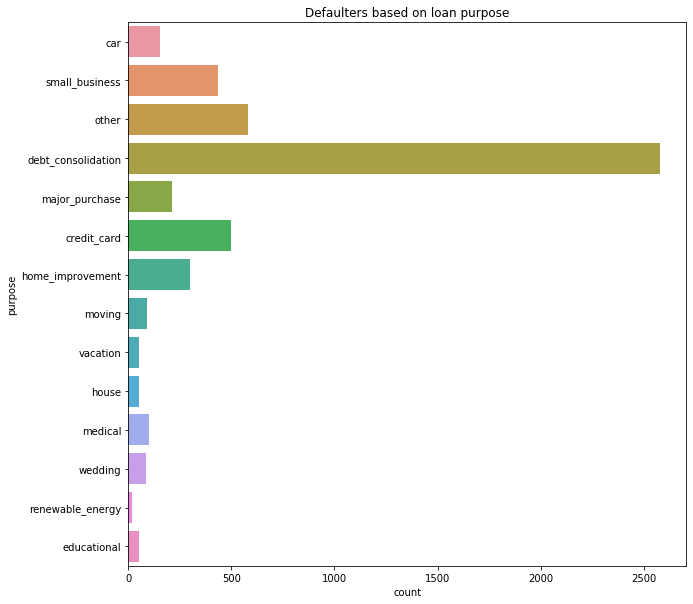

In [136]:
plt.figure(figsize=(10,10))
sns.countplot(y='purpose', data=charged_off).set(title='Defaulters based on loan purpose')

[Text(0.5, 1.0, 'Defaulters based on loan purpose')]

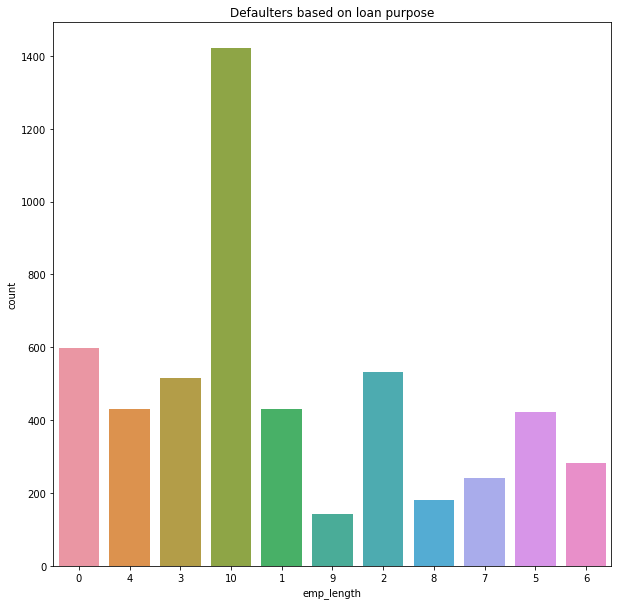

In [137]:
plt.figure(figsize=(10,10))
sns.countplot(x='emp_length', data=charged_off).set(title='Defaulters based on loan purpose')

# Observations

As per the above analysis, we have listed out the points about when the defaulting happens

- Loan applicants with grade 'B' and sub level 'B5' 
- Applicants having RENT as home ownership
- Defaulters are more who opt for 36 months term
- Applicants with verificaiton status not verifed
- Applicants whose interest rate in the range 9%-12%
- Applicants whose annual income is in the range 39K-55K
- Defaulters are more where the loan is issued on the month of Dec
- Every year there is a spike of 50% in defaulters
- Applicants with purpose 'Debt_consolidation'
- Applicants with employment length of 10 years



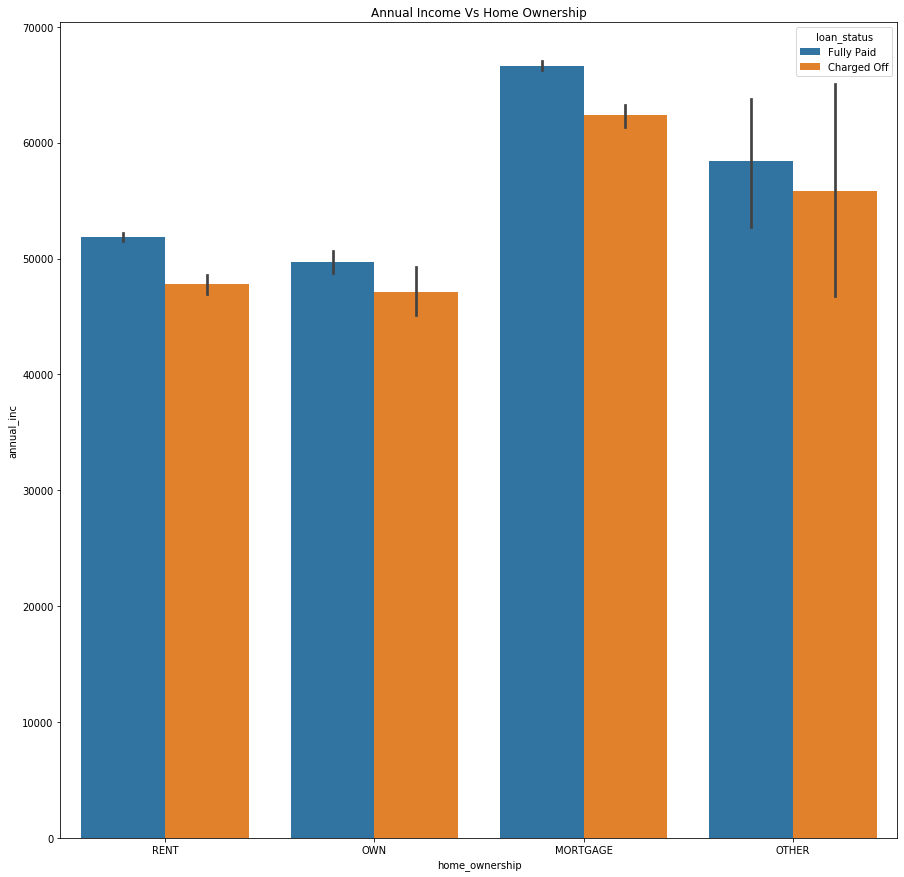

In [145]:
plt.figure(figsize=(15,15))
sns.barplot(data=loan, x='home_ownership', y='annual_inc', hue ='loan_status').set(title='Annual Income Vs Home Ownership')
plt.show()

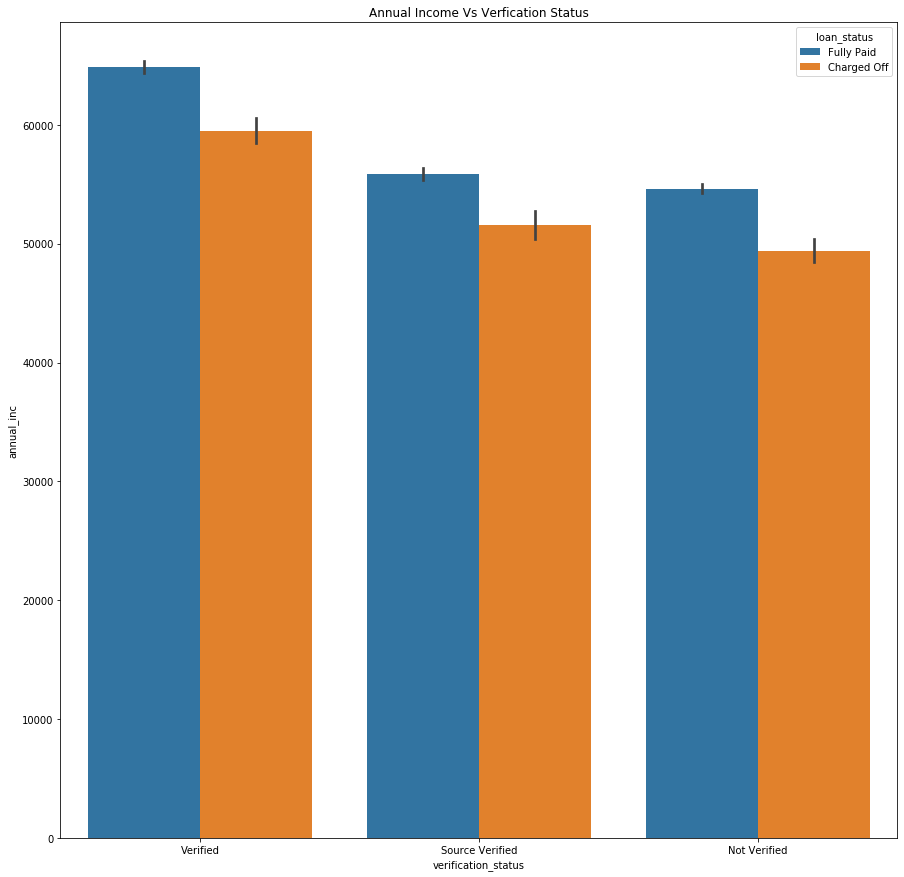

In [146]:
plt.figure(figsize=(15,15))
sns.barplot(data=loan, x='verification_status', y='annual_inc', hue ='loan_status').set(title='Annual Income Vs Verfication Status')
plt.show()

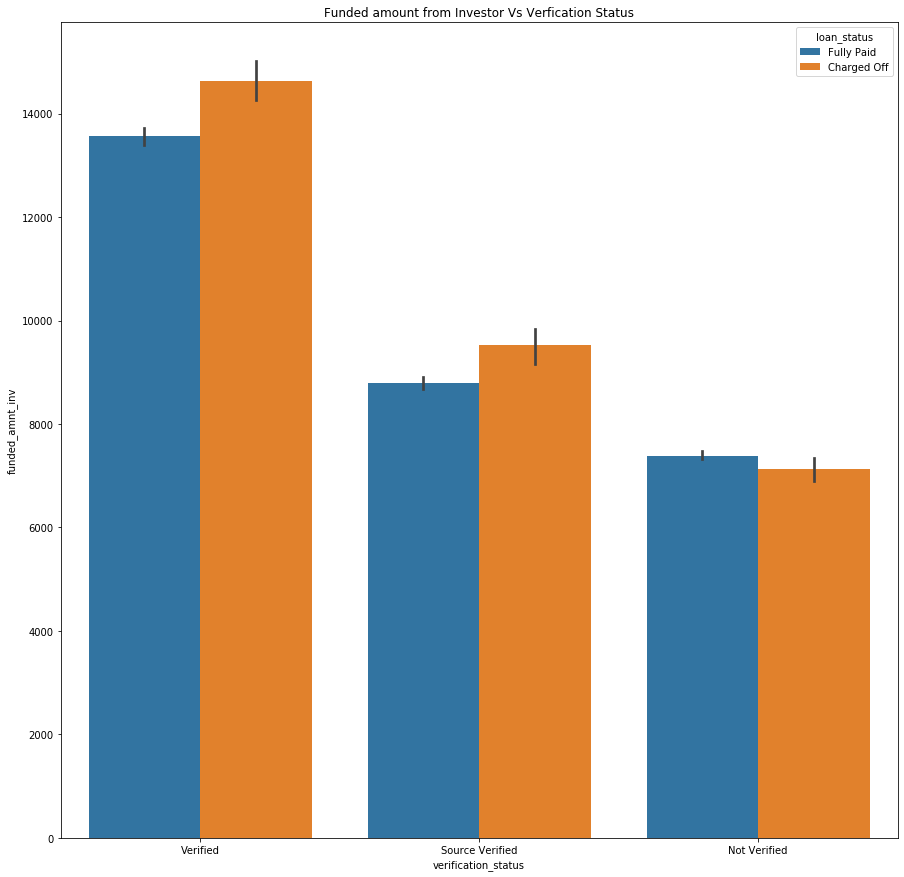

In [147]:
plt.figure(figsize=(15,15))
sns.barplot(data=loan, x='verification_status', y='funded_amnt_inv', hue ='loan_status').set(title='Funded amount from Investor Vs Verfication Status')
plt.show()

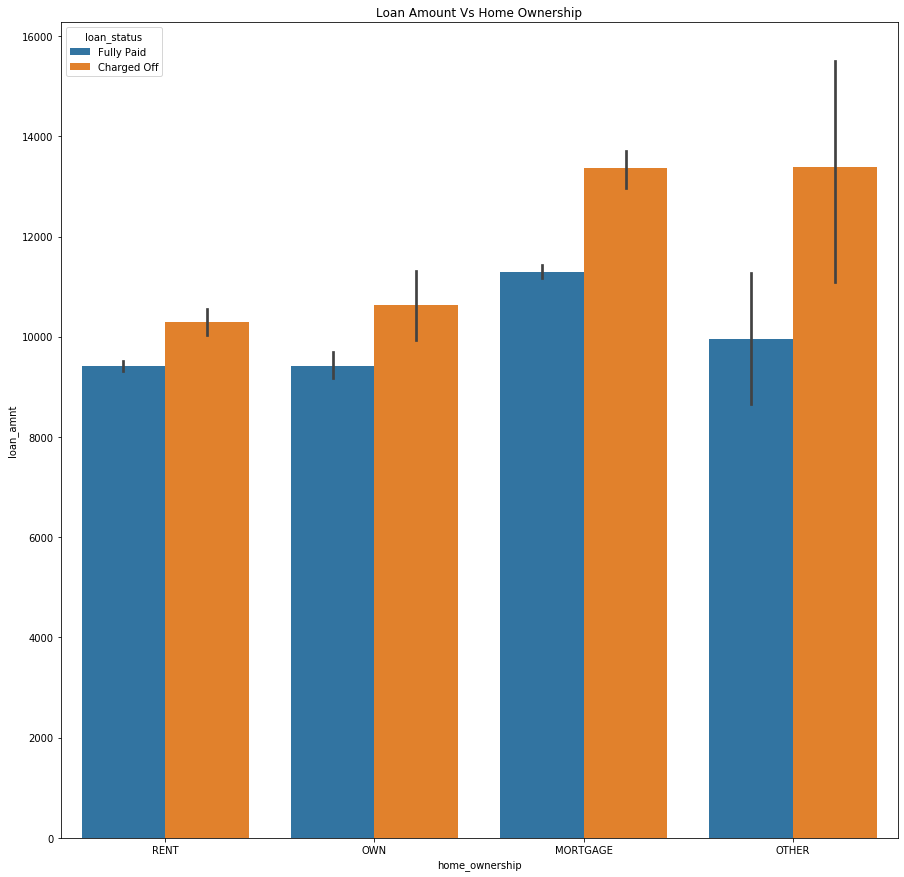

In [148]:
plt.figure(figsize=(15,15))
sns.barplot(data=loan, x='home_ownership', y='loan_amnt', hue ='loan_status').set(title='Loan Amount Vs Home Ownership')
plt.show()

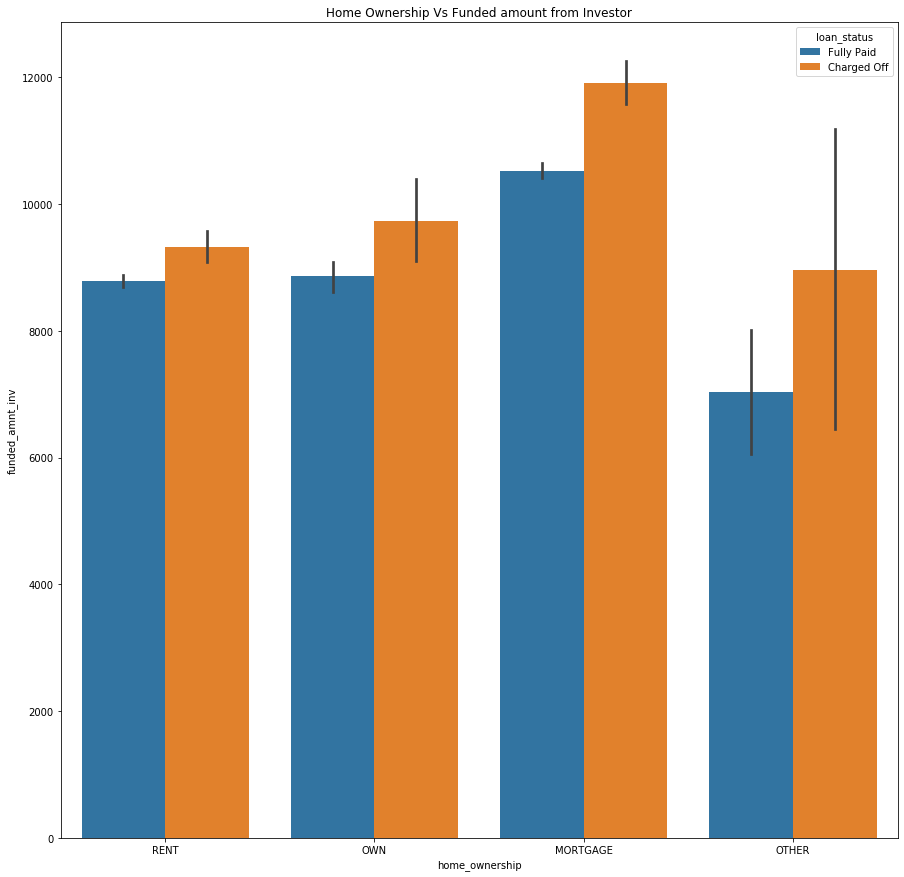

In [149]:
plt.figure(figsize=(15,15))
sns.barplot(data=loan, x='home_ownership', y='funded_amnt_inv', hue ='loan_status').set(title='Home Ownership Vs Funded amount from Investor')
plt.show()

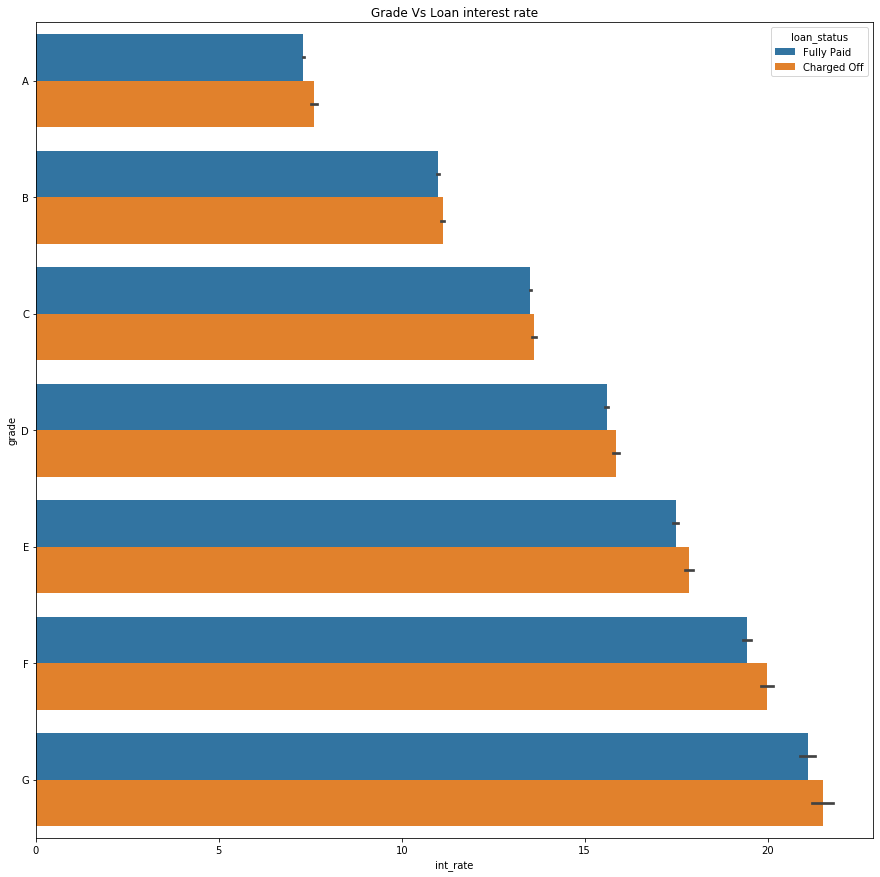

In [151]:
plt.figure(figsize=(15,15))
sns.barplot(data=loan, x='int_rate', y='grade', hue ='loan_status', order=gradeOrder).set(title='Grade Vs Loan interest rate')
plt.show()

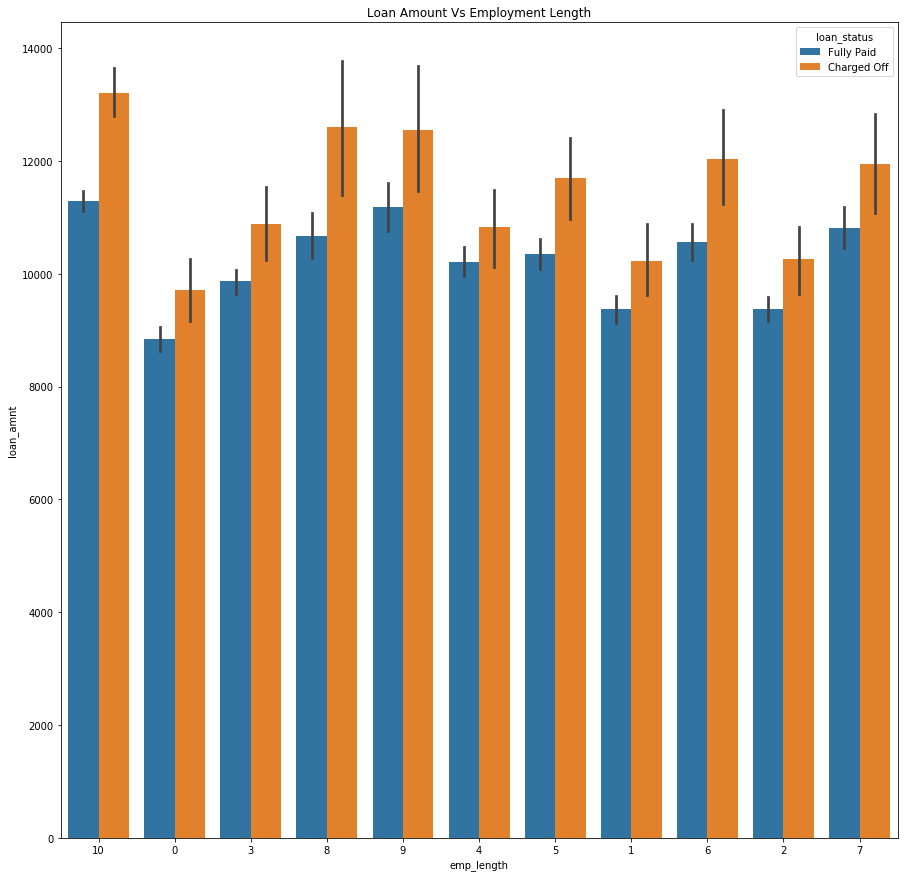

In [152]:
plt.figure(figsize=(15,15))
sns.barplot(data=loan, x='emp_length', y='loan_amnt', hue ='loan_status').set(title='Loan Amount Vs Employment Length')
plt.show()

# Observations

As per the above analysis, we have gather more insights on the defaulters and more probability of defaulting happen when

- Applicants annual income range of 55k-65k and home ownership is MORTAGE
- Applicants whose verification status is verified and annual income is above 55k
- Applicants whose verification status is verified and funded amount from investor is above 14k
- Applicants whose home ownership is MORTAGE and OTHER with requested loan amount above 12k
- Applicants whose home ownership is MORTAGE and funded amount from investor is in the range of 10k-12k
- Applicants with grade 'G' and interest rate is above 20%
- Applicants with 10 years employment and request loan amount above 12k

